#  imports 

In [2]:
import numpy as np
import gpflow
#  GLT coode
import spectral
from spectral import *
import spectral.io.envi as envi
import os
from osgeo import gdal
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import*
import matplotlib
from gpflow.utilities import print_summary
import pandas as pd
import os
from time import time
import time
import xarray as xa
from matplotlib.pyplot import *
import pdb
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import *
from operator import truediv
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
import pywt 
from scipy.signal import savgol_filter

C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
#  prepare 
df=pd.read_excel('C:/PGP_Reports/ArcGIS_maps/Total_new2021.xlsx',sheet_name="CWV_Angles_spectra")
df=df[df.columns[~df.isnull().all()]]
df=df.fillna(0)
#df=df.drop(df.index[[67]])
Y=df[df.columns[1]]
X=df[df.columns[18:]]
angles=df[df.columns[[10,11,13]]]
# angles=df[df.columns[10:14]]
# angles=df[df.columns[9:15]]
angles=np.array(angles)
Y=np.array(Y)
X=savgol_filter(X,9,3,0,mode='nearest')
# np.savetxt("raw.csv", X, delimiter=",")
def waveletTransform(x, wavelet='haar', level=4):
    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode="per" )   
    return coeff[6]
cD4 = np.array(waveletTransform(X))

X=pd.DataFrame(X)
x1= X[X.columns[43]]/X[X.columns[77]]
x2= X[X.columns[44]]/X[X.columns[64]]
x3= X[X.columns[50]]/X[X.columns[95]]
x4= X[X.columns[103]]/X[X.columns[111]]
x5= X[X.columns[103]]/X[X.columns[141]]
x6= X[X.columns[103]]/X[X.columns[177]]
x7= X[X.columns[122]]/X[X.columns[183]]
x8= X[X.columns[123]]/X[X.columns[217]]
x9= X[X.columns[180]]/X[X.columns[211]]
x10= X[X.columns[190]]/X[X.columns[213]]
x11=X[X.columns[220]]/X[X.columns[233]]
x12=X[X.columns[222]]/X[X.columns[269]]
x13=X[X.columns[270]]/X[X.columns[405]]
x14= X[X.columns[277]]/X[X.columns[281]]
x15= X[X.columns[278]]/X[X.columns[288]]
x16= X[X.columns[302]]/X[X.columns[313]]
x17= X[X.columns[377]]/X[X.columns[398]]
x18= X[X.columns[376]]/X[X.columns[408]]
x19= X[X.columns[293]]/X[X.columns[301]]
x20= X[X.columns[366]]/X[X.columns[370]]


Newx=pd.DataFrame(x1)
Newx[1]=x2
Newx[2]=x3
Newx[3]=x4
Newx[4]=x5
Newx[5]=x6
Newx[6]=x7
Newx[7]=x8
Newx[8]=x9
Newx[9]=x10
Newx[10]=x11
Newx[11]=x12
Newx[12]=x13
Newx[13]=x14
Newx[14]=x15
Newx[15]=x16
Newx[16]=x17
Newx[17]=x18
Newx[18]=x19
Newx[19]=x20

Newx=np.array(Newx)
spec=np.concatenate((angles,Newx), axis=1)
# spec=Newx
np.savetxt("wave.csv", cD4, delimiter=",")
np.savetxt("vi.csv", spec, delimiter=",")
# X_train, X_test, Y_train, Y_test = train_test_split(spec, Y, test_size=0.1, random_state=80)
scaler=StandardScaler()
# scaler=PowerTransformer(method='box-cox', standardize=True)

# x1=scaler.fit_transform(spec)
# x2=scaler.transform(spec)
# spec.shape

y_scaler = StandardScaler()
X_train = spec[1:1700,:]
x1=scaler.fit_transform(X_train)
X_test = spec[1100:,:]
x2=scaler.transform(X_test)
Y_train= Y[1:1700]
Y_train = Y_train.reshape(-1,1)
Y_test= Y[1100:]

In [7]:
spec.shape

(1742, 23)

In [8]:
# from sklearn.manifold import TSNE

# import metric_learn
# from sklearn.datasets import make_classification, make_regression
# import matplotlib.pyplot as plt
# X_train, Y_train = make_regression(n_samples=1000, n_informative=24, n_features=24,
#                                shuffle=True)
# def plot_tsne(X, y, colormap=plt.cm.Paired):
#     plt.figure(figsize=(8, 6))

#     # clean the figure
#     plt.clf()

#     tsne = TSNE()
#     X_embedded = tsne.fit_transform(X)
#     plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

#     plt.xticks(())
#     plt.yticks(())

#     plt.show()
# plot_tsne(X_train, Y_train, plt.cm.Oranges)

In [9]:
# mlkr = metric_learn.MLKR()
# mlkr.fit(x1, Y_train)
# x1 = mlkr.transform(x1)
# x2=mlkr.transform(x2)
# # plot_tsne(X_mlkr, Y_train, plt.cm.Oranges)

In [10]:
class Tanimoto(gpflow.kernels.Kernel):
    def __init__(self):
        super().__init__()
        # We constrain the value of the kernel variance to be positive when it's being optimised
        self.variance = gpflow.Parameter(1.0, transform=positive())

    def K(self, X, X2=None):
        """
        Compute the Tanimoto kernel matrix σ² * ((<x, y>) / (||x||^2 + ||y||^2 - <x, y>))
        :param X: N x D array
        :param X2: M x D array. If None, compute the N x N kernel matrix for X.
        :return: The kernel matrix of dimension N x M
        """
        if X2 is None:
            X2 = X

        Xs = tf.reduce_sum(tf.square(X), axis=-1)  # Squared L2-norm of X
        X2s = tf.reduce_sum(tf.square(X2), axis=-1)  # Squared L2-norm of X2
        outer_product = tf.tensordot(X, X2, [[-1], [-1]])  # outer product of the matrices X and X2

        # Analogue of denominator in Tanimoto formula

        denominator = -outer_product + broadcasting_elementwise(tf.add, Xs, X2s)

        return self.variance * outer_product/denominator

    def K_diag(self, X):
        """
        Compute the diagonal of the N x N kernel matrix of X
        :param X: N x D array
        :return: N x 1 array
        """
        return tf.fill(tf.shape(X)[:-1], tf.squeeze(self.variance))

In [11]:
def haversine_dist(X, X2):
    pi = np.pi / 180
    f = tf.expand_dims(X * pi, -2)  # ... x N x 1 x D
    f2 = tf.expand_dims(X2 * pi, -3)  # ... x 1 x M x D
    d = tf.sin((f - f2) / 2) ** 2
    lat1, lat2 = tf.expand_dims(X[:, 0] * pi, -1), \
                tf.expand_dims(X2[:, 0] * pi, -2)
    cos_prod = tf.cos(lat2) * tf.cos(lat1)
    a = d[:,:,0] + cos_prod * d[:,:,1]
    c = tf.asin(tf.sqrt(a)) * 6371 * 2
    return c


class HaversineDistance(gpflow.kernels.Stationary):
    def __init__(self, base: gpflow.kernels.Stationary):
        self.base = base

    @property
    def active_dims(self):
        return self.base.active_dims

    @property
    def variance(self):
        return self.base.variance  # for K_diag to work

    def K(self, X, X2=None, presliced=False):
        if not presliced:
            X, X2 = self.slice(X, X2)
        if X2 is None:
            X2 = X

        # Note that lengthscale is in Haversine distance space:
        r = haversine_dist(X, X2) / self.base.lengthscale

        if hasattr(self.base, "K_r"):
            return self.base.K_r(r)
        else:
            return self.base.K_r2(tf.square(r))

In [12]:
# import tensorflow_probability as tfp

# f64 = lambda x: np.array(x, dtype=np.float64)
# positive_with_min = lambda: tfp.bijectors.AffineScalar(shift=f64(1e-4))(tfp.bijectors.Softplus())
# constrained = lambda: tfp.bijectors.AffineScalar(shift=f64(1e-4), scale=f64(100.0))(
#     tfp.bijectors.Sigmoid()
# )
# max_abs_1 = lambda: tfp.bijectors.AffineScalar(shift=f64(-2.0), scale=f64(4.0))(
#     tfp.bijectors.Sigmoid()
# )

# patch_shape = [3, 3]
# conv_k = gpflow.kernels.Convolutional(gpflow.kernels.SquaredExponential(), X_train.shape, patch_shape)
# conv_k.base_kernel.lengthscales = gpflow.Parameter(1.0, transform=positive_with_min())
# # Weight scale and variance are non-identifiable. We also need to prevent variance from shooting off crazily.
# conv_k.base_kernel.variance = gpflow.Parameter(1.0, transform=constrained())
# conv_k.weights = gpflow.Parameter(conv_k.weights.numpy(), transform=max_abs_1())
# conv_f = gpflow.inducing_variables.InducingPatches(
#     np.unique(conv_k.get_patches(X).numpy().reshape(-1, 9), axis=0)
# )

In [13]:
from typing import List

import gpflow.kernels as gk

KERNEL_DICT = dict(
    White=gk.White,
    Constant=gk.Constant,
    ExpQuad=gk.RBF,
    RBF=gk.RBF,
    Matern12=gk.Matern12,
    Matern32=gk.Matern32,
    Matern52=gk.Matern52,
    Cosine=gk.Cosine,
    ArcCosine=gk.ArcCosine,
    Linear=gk.Linear,
    Periodic=gk.Periodic,
    RatQuad=gk.RationalQuadratic,
)


def load_default_basis_kernels(ls=1.0, input_dims=1) -> List:
    """  Define list of kernels to be used as input layer for the kernel network.
    Matches setup in Neural-Kernel-Network-master
    :param float ls: Initial lengthscale
    :return: List of kernels
    """

    kernel_params_list = [
    {'name': 'Linear', 'params': {'input_dim': input_dims, 'name': 'k0'}},
    {'name': 'Periodic', 'params': {'input_dim': input_dims, 'period': ls, 'lengthscales': ls, 'name': 'k1'}},
    {'name': 'ExpQuad', 'params': {'input_dim': input_dims, 'lengthscales': ls / 4.0, 'name': 'k2'}},
    {'name': 'RatQuad', 'params': {'input_dim': input_dims, 'alpha': 0.2, 'lengthscales': ls * 2.0, 'name': 'k3'}},
    {'name': 'Linear', 'params': {'input_dim': input_dims, 'name': 'k4'}},
    {'name': 'RatQuad', 'params': {'input_dim': input_dims, 'alpha': 0.1, 'lengthscales': ls, 'name': 'k5'}},
    {'name': 'ExpQuad', 'params': {'input_dim': input_dims, 'lengthscales': ls, 'name': 'k6'}},
    {'name': 'Periodic','params': {'input_dim': input_dims, 'period': ls / 4.0, 'lengthscales': ls / 4.0, 'name': 'k7'}}]
    kernel_list = []
    for kernel_param_dict in kernel_params_list:
        kernel_name = str(kernel_param_dict['name'])
        kernel_params = kernel_param_dict['params']
        kernel = KERNEL_DICT[kernel_name]
        initialised_kernel = kernel(**kernel_params)
        kernel_list.append(initialised_kernel)
    return kernel_list

In [14]:
class HeteroskedasticGaussian(gpflow.likelihoods.Likelihood):
    def __init__(self, **kwargs):
        # this likelihood expects a single latent function F, and two columns in the data matrix Y:
        super().__init__(latent_dim=24, observation_dim=24, **kwargs)

    def _log_prob(self, F, Y):
        # log_prob is used by the quadrature fallback of variational_expectations and predict_log_density.
        # Because variational_expectations is implemented analytically below, this is not actually needed,
        # but is included for pedagogical purposes.
        # Note that currently relying on the quadrature would fail due to https://github.com/GPflow/GPflow/issues/966
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        return gpflow.logdensities.gaussian(Y, F, NoiseVar)

    def _variational_expectations(self, Fmu, Fvar, Y):
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        Fmu, Fvar = Fmu[:, 0], Fvar[:, 0]
        return (
            -0.5 * np.log(2 * np.pi)
            - 0.5 * tf.math.log(NoiseVar)
            - 0.5 * (tf.math.square(Y - Fmu) + Fvar) / NoiseVar
        )

    # The following two methods are abstract in the base class.
    # They need to be implemented even if not used.

    def _predict_log_density(self, Fmu, Fvar, Y):
        raise NotImplementedError

    def _predict_mean_and_var(self, Fmu, Fvar):
        raise NotImplementedError

In [15]:
x1.shape

(1699, 23)

#  model 

In [16]:
import tensorflow as tf
from tqdm.auto import tqdm
from gpflow.mean_functions import Constant
from gpflow.utilities import positive, print_summary
from gpflow.utilities.ops import broadcasting_elementwise
from gpflow.utilities.ops import square_distance

minibatch_size = 21
# Y2 = Y.reshape(-1,1)   ....
Y2=np.float64(Y_train)#...
QX = X_train.shape[1]
k1 = gpflow.kernels.Matern52()
k2 = gpflow.kernels.Linear()
k3 = gpflow.kernels.RBF()
k4 = gpflow.kernels.SquaredExponential()
k5 = gpflow.kernels.White()
k6 = Tanimoto()
k7 = gpflow.kernels.ArcCosine()
k8 = gpflow.kernels.RationalQuadratic()
k9 = gpflow.kernels.AnisotropicStationary()
k10=HeteroskedasticGaussian()
k=k3*k7
meanf = gpflow.mean_functions.Zero()  
m = gpflow.models.GPR(data=(x1,Y2), mean_function=None,kernel=k1,noise_variance=2)
m.likelihood.variance.assign(0.02)
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=1000))
def run_adam(model, iterations):
    """
    Utility function running the Adam optimizer
    """

    # Create an Adam Optimizer action
    losses = []
    training_loss = model.training_loss
    optimizer = tf.optimizers.Adam()

    @tf.function
    def optimization_step():
        optimizer.minimize(training_loss, model.trainable_variables)

    for step in tqdm(range(iterations), total=iterations):
        optimization_step()
        if step % 10 == 0:
            elbo = -training_loss().numpy()
            losses.append(elbo)
    return losses
run_adam(model=m, iterations=500)
yt,sd=m.predict_y(x2)#...
# yt=np.reshape(yt,[-1])
# fig = px.scatter(x=Y, y=yt,width=500, height=500)
# fig.show()

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
yt.shape

TensorShape([642, 1])

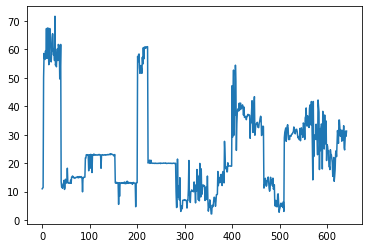

In [26]:
# yt1=y_scaler.inverse_transform(yt)
plot(yt)

#  metrics 

In [27]:
def regression_metrics(Y,yt):
    score = r2_score(Y, yt)
    mse = mean_squared_error(Y, yt)
    rmse = np.sqrt(mse)
    nrmse=(rmse/np.mean(Y))*100
    Variance = np.var(yt) 
    SSE = np.mean((np.mean(yt) - Y)** 2)
    Bias = SSE - Variance
    RPD=np.std(Y)/rmse
    return (score, mse, rmse, nrmse,Bias,RPD)
score, mse, rmse, nrmse,Bias,RPD = regression_metrics(Y_test,yt)
print('MSE CV: %5.3f' % mse)
print('R2 CV: %5.3f'  % score)
print('RMSE: %5.3f'  % rmse)
print('nRMSE: %5.3f'  % nrmse)
print('RPD: %5.3f'  % RPD)
print('Bias: %5.3f'  % Bias)

MSE CV: 21.462
R2 CV: 0.905
RMSE: 4.633
nRMSE: 19.940
RPD: 3.250
Bias: 10.323


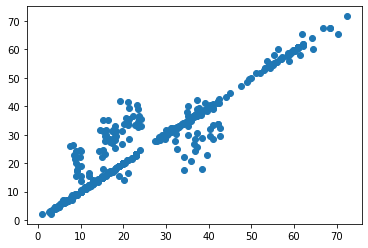

In [28]:
scatter(Y_test,yt)

#  helper functions

In [29]:
def apply_glt(glt, raster, background_value=-9999, out=None):
    print(glt.shape, raster.shape)
    out = np.zeros((glt.shape[0], glt.shape[1], 1))
    glt_pos = np.absolute(glt)
    glt_mask = np.all(glt_pos == 0, axis=2)
    out[glt_mask, :] = background_value
    print(out.shape)
    out[~glt_mask, :] = raster[glt_pos[~glt_mask, 1] - 1, glt_pos[~glt_mask, 0] - 1, :]
    del glt_mask
    del raster
    del glt_pos
    del background_value
    return out
def read (glt,name,img2):
#   get glt meta
    glt = open_image(glt)
    glt_memmap = glt.open_memmap(interleave='bip', writable=False)
    glt_metadata=glt.metadata   
    output_memmap=img2
    keys_from_glt = ['map info', 'samples', 'lines']
    gltinfo=glt_metadata['map info']
    gltSamples=glt_metadata['samples']
    gltLines=glt_metadata['lines']
    keys_from_glt = ['map info', 'samples', 'lines']
    geo_metadata = {**glt_metadata, **{k: glt.metadata[k] for k in glt.metadata.keys() & keys_from_glt}}
    print(name)
    geo_filename = name+"garbage.hdr"
    geo_file = envi.create_image(geo_filename, glt_metadata, force=True, ext='',writable=False)
    geo_memmap = geo_file.open_memmap(interleave='bip', writable=False)
    print(output_memmap.shape)
    return glt_memmap, output_memmap, geo_memmap


In [20]:
def get_ratios(strip):
#     strip1= strip[strip.columns[37]]/strip[strip.columns[50]]
#     strip2= strip[strip.columns[57]]/strip[strip.columns[68]]
#     strip3= strip[strip.columns[71]]/strip[strip.columns[153]]
#     strip4= strip[strip.columns[106]]/strip[strip.columns[123]]
#     strip5= strip[strip.columns[135]]/strip[strip.columns[157]]
#     strip6= strip[strip.columns[144]]/strip[strip.columns[221]]
#     strip7= strip[strip.columns[184]]/strip[strip.columns[217]]
#     strip8= strip[strip.columns[275]]/strip[strip.columns[286]]
#     strip9= strip[strip.columns[303]]/strip[strip.columns[316]]
#     strip10= strip[strip.columns[268]]/strip[strip.columns[408]]
#     strip11=strip[strip.columns[372]]/strip[strip.columns[386]]
#     strip12=strip[strip.columns[19]]/strip[strip.columns[53]]
#     strip13=strip[strip.columns[122]]/strip[strip.columns[220]]
#     strip14= strip[strip.columns[300]]/strip[strip.columns[417]]
    strip1= strip[strip.columns[43]]/strip[strip.columns[77]]
    strip2= strip[strip.columns[44]]/strip[strip.columns[64]]
    strip3= strip[strip.columns[50]]/strip[strip.columns[95]]
    strip4= strip[strip.columns[103]]/strip[strip.columns[111]]
    strip5= strip[strip.columns[103]]/strip[strip.columns[141]]
    strip6= strip[strip.columns[103]]/strip[strip.columns[177]]
    strip7= strip[strip.columns[122]]/strip[strip.columns[183]]
    strip8= strip[strip.columns[123]]/strip[strip.columns[217]]
    strip9= strip[strip.columns[180]]/strip[strip.columns[211]]
    strip10= strip[strip.columns[190]]/strip[strip.columns[213]]
    strip11=strip[strip.columns[220]]/strip[strip.columns[233]]
    strip12=strip[strip.columns[222]]/strip[strip.columns[269]]
    strip13=strip[strip.columns[270]]/strip[strip.columns[405]]
    strip14= strip[strip.columns[277]]/strip[strip.columns[281]]
    strip15= strip[strip.columns[278]]/strip[strip.columns[288]]
    strip16= strip[strip.columns[302]]/strip[strip.columns[313]]
    strip17= strip[strip.columns[377]]/strip[strip.columns[398]]
    strip18= strip[strip.columns[376]]/strip[strip.columns[408]]
    strip19= strip[strip.columns[293]]/strip[strip.columns[301]]
    strip20= strip[strip.columns[366]]/strip[strip.columns[370]]
    print("Dataframe")

    Newstrip=pd.DataFrame(strip1)
    Newstrip[1]=strip2
    Newstrip[2]=strip3
    Newstrip[3]=strip4
    Newstrip[4]=strip5
    Newstrip[5]=strip6
    Newstrip[6]=strip7
    Newstrip[7]=strip8
    Newstrip[8]=strip9
    Newstrip[9]=strip10
    Newstrip[10]=strip11
    Newstrip[11]=strip12
    Newstrip[12]=strip13
    Newstrip[13]=strip14
    Newstrip[14]=strip15
    Newstrip[15]=strip16
    Newstrip[16]=strip17
    Newstrip[17]=strip18
    Newstrip[18]=strip19
    Newstrip[19]=strip20
#     Newstrip[20]=strip21
#     Newstrip[21]=strip22
#     Newstrip[22]=strip23
#     Newstrip[23]=strip24
#     Newstrip[24]=strip25
#     Newstrip[25]=strip26
#     Newstrip[26]=strip27
#     Newstrip[27]=strip28
#     Newstrip[28]=strip29
#     Newstrip[29]=strip30
    return Newstrip  

In [261]:
def make_angles(file):
    driver = gdal.GetDriverByName('ENVI')
    driver.Register()
    raster = gdal.Open(file, gdal.GA_ReadOnly)
    geo_transform = raster.GetGeoTransform()
    proj = raster.GetProjectionRef()
    raster_array = raster.ReadAsArray().astype(np.float)
    raster_array = np.dstack(raster_array)
    rows, cols, n_bands = raster_array.shape
    angles_array = np.reshape(raster_array, (rows * cols, n_bands))
    return angles_array
three=glob.glob(r'W:\pgp\NPT\4_Fenix\2021_9Nov\CWV+Angles\Angles\*_r20_*.img')
# angle_image=[three[1]]
angles_array=make_angles(three[0])
# angles_array=angles_array[:,6:8]
angles_array=angles_array[:,[3,4,6]]
# angles_array=make_angles(r'W:\pgp\NPT\4_Fenix\2020_12Nov\IlluminationAnglesData\GeoRef_NPT2020_r14_2020-11-12_14-41-01_syncedNav.img')
# angles_array=angles_array[:,5:7]

C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [262]:
angles_array[1,:]

array([ 48.04562759,  59.80411911, 173.20863342])

In [263]:
def make_olsen(file):
    time_start = time.clock()
#     da=xa.open_rasterio(r"\\tur-nzcpa1\PGP\NPT\4. Fenix\2020_12Nov\test\r1_ATM.img")
    print(file)
#     da=xa.open_rasterio(file)
#     da=da.transpose("y","x","band")
#     das=np.array(da)
    driver = gdal.GetDriverByName('ENVI')
    driver.Register()
    raster = gdal.Open(file, gdal.GA_ReadOnly)
    geo_transform = raster.GetGeoTransform()
    proj = raster.GetProjectionRef()
    raster_array = raster.ReadAsArray().astype(np.float)
    raster_array = np.dstack(raster_array)
    rows, cols, n_bands = raster_array.shape
    raster_array = np.reshape(raster_array, (rows * cols, n_bands))
    print("Savgolay and removal of band 175")
    strip=savgol_filter(raster_array,9,3,0,mode='nearest')
    strip=pd.DataFrame(strip)
#     strip=strip.drop([175],axis=1)##449
    strip=np.array(strip)
    strip=pd.DataFrame(strip)
    print("strip.shape")
#     strip.columns = list(range(1, 449))##449
    print("Get simple ratios")
    Newstrip=get_ratios(strip)
#     stripcD4 = np.array(waveletTransform(strip))#wavelet
#     stripcdy = stripcD4[:,25:30]#wavelet
#     stripcdy=np.array(stripcdy)#wavelet
    print("NAN and Inf removal")   
    Newstrip=np.array(Newstrip)
#     Newstrip =np.concatenate((Newstrip, stripcdy), axis=1)#wavelet
#     angle_array=angle_image
    
    Newstrip =np.concatenate((angles_array,Newstrip), axis=1)
    Newstrip[Newstrip==np.inf]=np.nan
    Newstrip = np.nan_to_num(Newstrip)
    Newstrip=np.array(Newstrip)
    Newstrip=scaler.transform(Newstrip)
    Newstrip=np.array(Newstrip,dtype='float64')
    print("To chunks and inference")   
    results=[]
    bla=np.array_split(Newstrip, 80)
    print(bla[0].shape)
    for i in range(len(bla)):
        yt,sd=m.predict_y(bla[i])
        results.append(yt)
    img=np.concatenate(results)
    print("reshaping predicted olsenp to 2D")
    img = np.reshape(img, (rows, cols))
    img=img.reshape(img.shape[0],img.shape[1],1)
    return img


In [264]:
# two=glob.glob(r"Z:\NBA\4. Fenix\Spring2020\Output_WithoutTarps\*r4_ATM*")
# two

In [265]:
#two=glob.glob(r"D:\test\*r30_*")
two=glob.glob(r"W:\pgp\NPT\4_Fenix\2021_9Nov\AtmCorrected\*r20_*")[0:2]
two

['W:\\pgp\\NPT\\4_Fenix\\2021_9Nov\\AtmCorrected\\r20_AtmCorr.hdr',
 'W:\\pgp\\NPT\\4_Fenix\\2021_9Nov\\AtmCorrected\\r20_AtmCorr.img']

In [266]:
# one=glob.glob(r"W:\pgp\SMB\4. Fenix\GLT\*r12_*GLT*")
one=glob.glob(r"W:\pgp\NPT\4_Fenix\2021_9Nov\GLT\*r20_*GLT*")
one

['W:\\pgp\\NPT\\4_Fenix\\2021_9Nov\\GLT\\r20_2021-11-09_13-24-29_GLT.dat',
 'W:\\pgp\\NPT\\4_Fenix\\2021_9Nov\\GLT\\r20_2021-11-09_13-24-29_GLT.hdr']

In [267]:
# files=[r"Z:\NPT\4. Fenix\2020_12Nov\test\r1_ATM.img"]
# GLTdats=[r"\\tur-nzcpa1\PGP\NPT\4. Fenix\2020_12Nov\GLT_8M_LINZ\NPT2020_r2_2020-11-12_13-54-17_GLT.dat"]
# gltHeaders=[r"\\tur-nzcpa1\PGP\NPT\4. Fenix\2020_12Nov\GLT_8M_LINZ\NPT2020_r2_2020-11-12_13-54-17_GLT.hdr"]
# ythdrs=[r"Z:\NPT\4. Fenix\2020_12Nov\test\r2_ATM.hdr"]
files=[two[1]]
GLTdats=[one[0]]
gltHeaders=[one[1]]
ythdrs=[two[0]]
os.path.basename(two[1])

'r20_AtmCorr.img'

In [268]:
# for i in range(len(files)):
#     drivers = gdal.GetDriverByName('ENVI')
#     drivers.Register()
#     rasters = gdal.Open(GLTdats[i], gdal.GA_ReadOnly)
#     geo_transform = rasters.GetGeoTransform()
#     proj = rasters.GetProjectionRef()
#     print(files[i])
#     img=make_olsen(files[i])
    
# img.shape
# img1=img.reshape(15162,384,30)
# import spectral.io.envi as envi
# envi.save_image('sample.hdr',img1)
for i in range(len(files)):
    drivers = gdal.GetDriverByName('ENVI')
    drivers.Register()
    rasters = gdal.Open(GLTdats[i], gdal.GA_ReadOnly)
    geo_transform = rasters.GetGeoTransform()
    proj = rasters.GetProjectionRef()
    print(files[i])
    img=make_olsen(files[i])
    glt_memmap, output_memmap, geo_memmap= read(gltHeaders[i],ythdrs[i],img)
    cor=apply_glt(glt_memmap, output_memmap,out=geo_memmap)
    cor=cor[:,:,0]
    # img_folder = os.path.join(os.getcwd(), "olsen")
    str1 = os.path.basename(files[i])
    str2 = "rectifed_olsen.tif"
    newstr = " ".join((str1, str2))
#     print(newstr)
#     outfile = os.path.join(os.getcwd(), "tempolsenp")
#     newstr = " ".join((outfile, newstr))
#     print(newstr)
    myloc=r"C:\\Users\\prreddy\\Documents\\Python\\tempolsenp1\\"+newstr
    outdriver = gdal.GetDriverByName('GTiff')
    outdata = outdriver.Create(myloc,cor.shape[1],cor.shape[0],1, gdal.GDT_Float64)
    outdata.GetRasterBand(1).WriteArray(cor)
    outdata.SetGeoTransform(geo_transform)
    outdata.SetProjection(proj)
    outdata.GetRasterBand(1).SetNoDataValue(-9999)
    outdata.FlushCache()

W:\pgp\NPT\4_Fenix\2021_9Nov\AtmCorrected\r20_AtmCorr.img
W:\pgp\NPT\4_Fenix\2021_9Nov\AtmCorrected\r20_AtmCorr.img


C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\prreddy\Anaconda3\envs\tensors\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


Savgolay and removal of band 175
strip.shape
Get simple ratios
Dataframe
NAN and Inf removal
To chunks and inference
(54936, 23)
reshaping predicted olsenp to 2D
W:\pgp\NPT\4_Fenix\2021_9Nov\AtmCorrected\r20_AtmCorr.hdr
(11445, 384, 1)
(8331, 750, 2) (11445, 384, 1)
(8331, 750, 1)


In [ ]:
file = 'W:\\pgp\\NPT\\4. Fenix\\2020_12Nov\\NPT_Output_28032021\\r1_ATM.img'
driver = gdal.GetDriverByName('ENVI')
driver.Register()
raster = gdal.Open(file, gdal.GA_ReadOnly)
geo_transform = raster.GetGeoTransform()
proj = raster.GetProjectionRef()
raster_array = raster.ReadAsArray().astype(np.float)
raster_array = np.dstack(raster_array)
rows, cols, n_bands = raster_array.shape
raster_array = np.reshape(raster_array, (rows * cols, n_bands))
print("Savgolay and removal of band 175")
strip=savgol_filter(raster_array,9,3,0,mode='nearest')
strip=pd.DataFrame(strip)
strip=strip.drop([175],axis=1)
strip=np.array(strip)
strip=pd.DataFrame(strip)
strip.columns = list(range(1, 449))
print("Get simple ratios")
Newstrip=get_ratios(strip)






In [ ]:
file=r'W:\pgp\NPT\4. Fenix\2020_12Nov\IlluminationAnglesData\GeoRef_NPT2020_r1_2020-11-12_13-51-50_syncedNav.img'
driver = gdal.GetDriverByName('ENVI')
driver.Register()
raster = gdal.Open(file, gdal.GA_ReadOnly)
geo_transform = raster.GetGeoTransform()
proj = raster.GetProjectionRef()
raster_array = raster.ReadAsArray().astype(np.float)
raster_array = np.dstack(raster_array)
rows, cols, n_bands = raster_array.shape
angles_array = np.reshape(raster_array, (rows * cols, n_bands))
    


# angle_array=angle_image
# angle1=angle_array[:,3:8]
# Newstrip =np.concatenate((angles,Newstrip), axis=1)

In [ ]:
angle1=angles_array[:,3:9]
Newstrip =np.concatenate((angle1,Newstrip), axis=1)
Newstrip.shape

In [ ]:
file = 'W:\\pgp\\NPT\\4. Fenix\\2020_12Nov\\IlluminationAnglesData\\GeoRef_NPT2020_r13_2020-11-12_14-36-29_syncedNav.img'
driver = gdal.GetDriverByName('ENVI')
driver.Register()
raster = gdal.Open(file, gdal.GA_ReadOnly)
geo_transform = raster.GetGeoTransform()
proj = raster.GetProjectionRef()
raster_array = raster.ReadAsArray().astype(np.float)
raster_array = np.dstack(raster_array)
rows, cols, n_bands = raster_array.shape
angles_array = np.reshape(raster_array, (rows * cols, n_bands))

In [ ]:
angle1=angle_array[:,3:8]
Newstrip1 =np.concatenate((angles,Newstrip), axis=1)

In [ ]:
print("NAN and Inf removal")   
Newstrip=np.array(Newstrip)
Newstrip[Newstrip==np.inf]=np.nan
Newstrip = np.nan_to_num(Newstrip)
Newstrip=np.array(Newstrip)
Newstrip=scaler.transform(Newstrip)
Newstrip=np.array(Newstrip,dtype='float64')
print("To chunks and inference")   
results=[]
bla=np.array_split(Newstrip, 40)
print(bla[0].shape)
for i in range(len(bla)):
    yt,sd=m.predict_y(bla[i])
    results.append(yt)
img=np.concatenate(results)
print("reshaping predicted olsenp to 2D")
img = np.reshape(img, (rows, cols))
img=img.reshape(img.shape[0],img.shape[1],1)

In [ ]:
imshow(img)

In [ ]:
import spectral.io.envi as envi
envi.save_image('strip4.hdr',img)

In [ ]:
# for i in range(len(files)):
#     drivers = gdal.GetDriverByName('ENVI')
#     drivers.Register()
#     rasters = gdal.Open(GLTdats[i], gdal.GA_ReadOnly)
#     geo_transform = rasters.GetGeoTransform()
#     proj = rasters.GetProjectionRef()
#     print(files[i])
#     img=make_olsen(files[i])
    
# img.shape
# img1=img.reshape(15162,384,30)
# import spectral.io.envi as envi
# envi.save_image('sample.hdr',img1)
for i in range(len(files)):
    drivers = gdal.GetDriverByName('ENVI')
    drivers.Register()
    rasters = gdal.Open(GLTdats[i], gdal.GA_ReadOnly)
    geo_transform = rasters.GetGeoTransform()
    proj = rasters.GetProjectionRef()
    print(files[i])
    img=make_olsen(files[i])
    glt_memmap, output_memmap, geo_memmap= read(gltHeaders[i],ythdrs[i],img)
    cor=apply_glt(glt_memmap, output_memmap,out=geo_memmap)
    cor=cor[:,:,0]
    # img_folder = os.path.join(os.getcwd(), "olsen")
    str1 = os.path.basename(files[i])
    str2 = "rectifed_olsen.tif"
    newstr = " ".join((str1, str2))
#     print(newstr)
#     outfile = os.path.join(os.getcwd(), "tempolsenp")
#     newstr = " ".join((outfile, newstr))
#     print(newstr)
    myloc=r"C:\\Users\\prreddy\\Documents\\Python\\tempolsenp\\"+newstr
    outdriver = gdal.GetDriverByName('GTiff')
    outdata = outdriver.Create(myloc,cor.shape[1],cor.shape[0],1, gdal.GDT_Float64)
    outdata.GetRasterBand(1).WriteArray(cor)
    outdata.SetGeoTransform(geo_transform)
    outdata.SetProjection(proj)
    outdata.GetRasterBand(1).SetNoDataValue(-9999)
    outdata.FlushCache()

In [ ]:
import glob
fileList = glob.glob(r'Z:\NPT\4. Fenix\2020_12Nov\NPT_Output_28032021\*garbage*')

In [ ]:
for i in range(len(fileList)):
    try:
        os.remove(fileList[i])
    except:
        print("I cant delete it")

In [ ]:
import numpy as np
import math
def SAM(s1, s2):
    """
    Computes the spectral angle mapper between two vectors (in radians).
    Parameters:
        s1: `numpy array`
            The first vector.
        s2: `numpy array`
            The second vector.
    Returns: `float`
            The angle between vectors s1 and s2 in radians.
    """
    try:
        s1_norm = math.sqrt(np.dot(s1, s1))
        s2_norm = math.sqrt(np.dot(s2, s2))
        sum_s1_s2 = np.dot(s1, s2)
        angle = math.acos(sum_s1_s2 / (s1_norm * s2_norm))
    except ValueError:
        # python math don't like when acos is called with
        # a value very near to 1
        return 0.0
    return angle

In [ ]:
def SID(s1, s2):
    """
    Computes the spectral information divergence between two vectors.
    Parameters:
        s1: `numpy array`
            The first vector.
        s2: `numpy array`
            The second vector.
    Returns: `float`
            Spectral information divergence between s1 and s2.
    Reference
        C.-I. Chang, "An Information-Theoretic Approach to SpectralVariability,
        Similarity, and Discrimination for Hyperspectral Image"
        IEEE TRANSACTIONS ON INFORMATION THEORY, VOL. 46, NO. 5, AUGUST 2000.
    """
    p = (s1 / np.sum(s1)) + np.spacing(1)
    q = (s2 / np.sum(s2)) + np.spacing(1)
    return np.sum(p * np.log(p / q) + q * np.log(q / p))

In [ ]:
def chebyshev(s1, s2):
    """
    Computes the chebychev distance between two vector.
    Parameters:
        s1: `numpy array`
            The first vector.
        s2: `numpy array`
            The second vector.
    Returns: `float`
            Chebychev distance between s1 and s2.
    """
    return np.amax(np.abs(s1 - s2))